Parte 1 - Montagem do drive e leitura do arquivo

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

dados = pd.read_csv('breastcancer.csv')
dados

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Exclui a coluna com o identificador (id) do paciente e outra que é formada por valores nulos (Unnamed: 32)

In [12]:
# Removendo as colunas desnecessárias
dados = dados.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Verificando se as colunas foram removidas
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Converte os valores da coluna diagnosis para uma representação numérica

In [13]:
# Conversão da coluna diagnosis para valores numéricos
# M = 1 (maligno) e B = 0 (benigno)
dados['diagnosis'] = dados['diagnosis'].map({'M': 1, 'B': 0})

# Verificação da conversão
print(dados['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


Cria a matriz X com todos atributos, exceto o resultado (diagnosis);
Cria o vetor y com o atributo resultado;
Divide os dados em 33% para teste e 67% para treinamento.

In [15]:
# Criar matriz X (todos os atributos exceto diagnosis)
X = dados.drop(columns=['diagnosis'])

# Criar vetor y (somente o atributo diagnosis)
y = dados['diagnosis']

# Dividir os dados em 67% treino e 33% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


# Exibir informações básicas para conferência
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)
print("\nPrimeiras linhas da matriz X:")
print(X_train.head())
print("\nPrimeiras linhas do vetor y:")
print(y_train.head())

Tamanho do conjunto de treino: (381, 30)
Tamanho do conjunto de teste: (188, 30)

Primeiras linhas da matriz X:
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
172        15.46         11.89          102.50      736.9          0.12570   
407        12.85         21.37           82.63      514.5          0.07551   
56         19.21         18.57          125.50     1152.0          0.10530   
497        12.47         17.31           80.45      480.1          0.08928   
301        12.46         19.89           80.43      471.3          0.08451   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
172           0.15550         0.20320              0.10970         0.1966   
407           0.08316         0.06126              0.01867         0.1580   
56            0.12670         0.13230              0.08994         0.1917   
497           0.07630         0.03609              0.02369         0.1526   
301           0.10140         0.06

Parte 2 - Exemplo de criação e treinamento de Redes Neurais do tipo MLP (Perceptron Multicamadas)

Cria e treina uma rede MLP com os valores padrões para seus parâmetros. Em seguidas, apresenta os resultados dos dados de treinamento e de teste.

c:\Users\roberto\Documents\faculdade Patriki\patriki\Patriki\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dados de treinamento
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       236
           1       0.97      0.88      0.92       145

    accuracy                           0.94       381
   macro avg       0.95      0.93      0.94       381
weighted avg       0.94      0.94      0.94       381

Dados de teste
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       121
           1       1.00      0.94      0.97        67

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



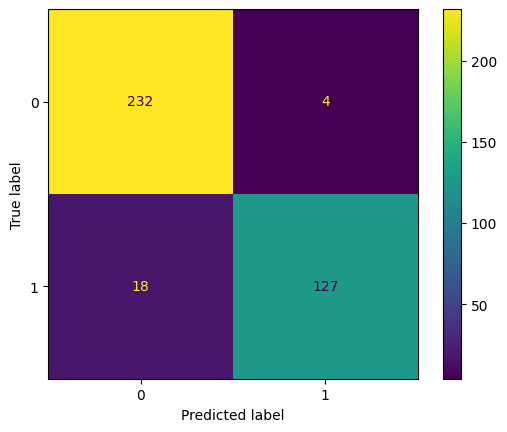

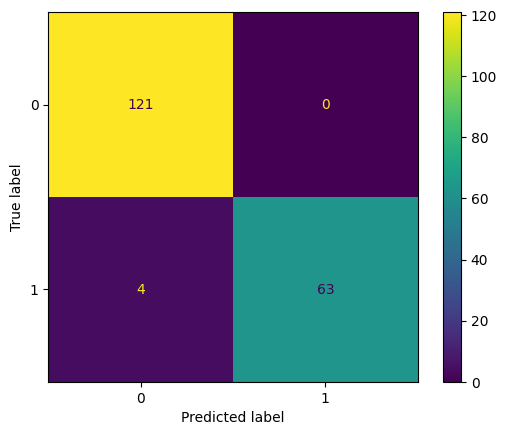

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

modelo = MLPClassifier(random_state=13)
modelo.fit(X_train, y_train)

print("Dados de treinamento")
y_pred_train = modelo.predict(X_train)
relatorio = classification_report(y_train, y_pred_train)
print(relatorio)
matriz_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_train)
disp.plot()

print("Dados de teste")
y_pred = modelo.predict(X_test)
relatorio = classification_report(y_test, y_pred)
print(relatorio)
matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()

Ao passar True como valor do parâmetro verbose, a perda (loss) de cada iteração é apresentada.

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

modelo = MLPClassifier(random_state=13, verbose=True)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
relatorio = classification_report(y_test, y_pred)
print(relatorio)

Iteration 1, loss = 18.88276976
Iteration 2, loss = 9.43023607
Iteration 3, loss = 4.44352607
Iteration 4, loss = 7.49571552
Iteration 5, loss = 4.83849792
Iteration 6, loss = 2.12807276
Iteration 7, loss = 3.64895888
Iteration 8, loss = 3.37776987
Iteration 9, loss = 1.55691882
Iteration 10, loss = 1.05163409
Iteration 11, loss = 1.67063157
Iteration 12, loss = 1.36630746
Iteration 13, loss = 0.66005597
Iteration 14, loss = 0.63498984
Iteration 15, loss = 0.91429098
Iteration 16, loss = 0.79109361
Iteration 17, loss = 0.49751914
Iteration 18, loss = 0.50227836
Iteration 19, loss = 0.62017088
Iteration 20, loss = 0.61228804
Iteration 21, loss = 0.48549493
Iteration 22, loss = 0.44686971
Iteration 23, loss = 0.49402817
Iteration 24, loss = 0.49825456
Iteration 25, loss = 0.44546458
Iteration 26, loss = 0.43115754
Iteration 27, loss = 0.44817320
Iteration 28, loss = 0.44828200
Iteration 29, loss = 0.42575629
Iteration 30, loss = 0.41292707
Iteration 31, loss = 0.42342021
Iteration 32, lo

c:\Users\roberto\Documents\faculdade Patriki\patriki\Patriki\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Perceba que o ajuste dos pesos foi interrompido na iteração 200, enquanto a perda ainda estava reduzindo. Altere o número de iterações máximo para 300, por meio do parâmetro max_iter e avalie os resultados.

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

modelo = MLPClassifier(max_iter = 300, random_state=13, verbose=True)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
relatorio = classification_report(y_test, y_pred)
print(relatorio)

Iteration 1, loss = 18.88276976
Iteration 2, loss = 9.43023607
Iteration 3, loss = 4.44352607
Iteration 4, loss = 7.49571552
Iteration 5, loss = 4.83849792
Iteration 6, loss = 2.12807276
Iteration 7, loss = 3.64895888
Iteration 8, loss = 3.37776987
Iteration 9, loss = 1.55691882
Iteration 10, loss = 1.05163409
Iteration 11, loss = 1.67063157
Iteration 12, loss = 1.36630746
Iteration 13, loss = 0.66005597
Iteration 14, loss = 0.63498984
Iteration 15, loss = 0.91429098
Iteration 16, loss = 0.79109361
Iteration 17, loss = 0.49751914
Iteration 18, loss = 0.50227836
Iteration 19, loss = 0.62017088
Iteration 20, loss = 0.61228804
Iteration 21, loss = 0.48549493
Iteration 22, loss = 0.44686971
Iteration 23, loss = 0.49402817
Iteration 24, loss = 0.49825456
Iteration 25, loss = 0.44546458
Iteration 26, loss = 0.43115754
Iteration 27, loss = 0.44817320
Iteration 28, loss = 0.44828200
Iteration 29, loss = 0.42575629
Iteration 30, loss = 0.41292707
Iteration 31, loss = 0.42342021
Iteration 32, lo

O treinamento parou na iteração 212, antes de atingir o limite máximo de iterações. Isto ocorre porque a rede interrompe o treinamento após um determinado número de iterações sem melhorias significativas.

Parte 3 - Atividade - Configuração e teste dos parâmetros da RNA.

Entre no link abaixo e analise os parâmetros que podem ser configurados durante a criação de uma RNA do tipo MLP.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn-neural-network-mlpclassifier

Crie um código que altere automaticamente os valores dos parâmetros abaixo e compare as acurácias obtidas por eles no conjunto de teste.

activation;
hidden_layer_sizes;
batch_size;
learning_rate;
learning_rate_init;
max_iter;
tol;
n_iter_no_change.